<a href="https://colab.research.google.com/github/tarabelo/2024-EInvierno-CAPAP-H/blob/main/Puertas_cu%C3%A1nticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos qiskit en el notebook
!pip install qiskit[visualization] qiskit-aer

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# importing Qiskit
from qiskit import QuantumCircuit, transpile, execute
from qiskit.providers.aer import AerSimulator

# import basic plot tools
from qiskit.visualization import plot_histogram

# Define el simulador básico
sim = AerSimulator()

# 3. Puertas cuánticas

### Contenidos

1. [Puertas clásicas vs cuánticas](#clasicascuanticas)
  - [Puertas clásicas](#clasicas)
  - [Puertas cuánticas](#cuanticas)
 <p></p>
1. [Puertas de 1 cúbit](#1cubit)
    + [Puertas notables](#notables)
    - [Puertas como rotaciones en la esfera de Bloch](#bloch)
    + [Puertas genéricas](#generica)    
    - [Puertas de 1 cúbit en un sistema multicúbit](#puertas1c)
 <p></p>
1.  [Puerta de 2 cúbits: CNOT](#cnot)
    + [Estados de Bell](#bell)
    + [Puerta swap](#swap)
<p></p>
1. [Otras puertas controladas](#otrasp)
     + [Phase-kickback](#kick)
<p></p>
1. [Puertas para múltiples cúbits](#multiples)
    + [Puerta _Walsh-Hadamard_](#wh)
    + [Puerta Toffoli (Controlled-Controlled-NOT o CCX)](#toffoli)
    + [Puertas controladas genéricas](#genericas)

# Puertas clásicas vs cuánticas<a id="clasicascuanticas"></a>

Las puertas clásicas (NOT, AND, OR, NAN, EXOR) actúan sobre 1 (NOT) o 2 bits.

Las principales puertas cuánticas también operan sobre 1 o 2 cúbits, manteniendo las restricciones impuestas por la física (reversibilidad).

## Puertas clásicas <a id="clasicas"></a>

## Puertas clásicas como matrices

Podemos representar las puertas lógicas clásicas como matrices u operadores, tales que aplicados a un número binario obtienen un número binario.

Por ejemplo:

$$
\begin{aligned}
\text{NOT} &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\\[10pt]
\text{AND} &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}\\[10pt]
\text{OR} &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}\\[10pt]
\end{aligned}
$$

Ejemplos:

$$
\begin{aligned}
\text{NOT}|0\rangle &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}
\begin{bmatrix} 1\\ 0\end{bmatrix} = \begin{bmatrix} 0\\ 1\end{bmatrix} = |1\rangle
\\[10pt]
\text{AND}|11\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{AND}|01\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 1 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 1\\0\\0\end{bmatrix} = \begin{bmatrix} 1\\ 0\end{bmatrix} = |0\rangle \\[10pt]
\text{OR}|10\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\1\\0\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{OR}|11\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle\\[10pt]
\end{aligned}
$$

Podemos obtener la representación de un conjunto de puertas mediante operaciones de matrices. Por ejemplo:

<center><img src="https://drive.google.com/uc?export=view&id=1ZwHOf-211JlZGff4w8GhFTatdJBtYrUC" alt="Circuito con puertas clasicas" width="300"  /></center>
La matriz equivalente a este circuito es:

$$
\text{OR}\cdot (\text{NOT}\otimes \text{AND}) =
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\left(
\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\otimes
\begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\right) = \\[10pt]
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{bmatrix} =
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

Es decir, las puertas en paralelo se combinan usando el producto tensor y en serie el producto matricial.

### Computación reversible

Las puertas clásicas, exceptuando la puerta NOT, son no-reversibles: no es posible obtener la entrada a partir de los valores de salida.

También puede verse en que las matrices, excepto la NOT, no son invertibles.

El modelo de [computación reversible](https://en.wikipedia.org/wiki/Reversible_computing) substituye las puertas clásicas por sus equivalentes reversibles:

<center><img src="https://drive.google.com/uc?export=view&id=1kZGt2hLqpdlg6YTOfy9xOTWb3y9UX_FV" alt="Puertas reversibles" width="500"  /></center>

La [puerta Toffoli](https://en.wikipedia.org/wiki/Toffoli_gate) es universal: cualquier circuito booleano se puede expresar usando solo puertas Toffoli.

Otra puerta universal reversible es la [puerta Fredkin](https://en.wikipedia.org/wiki/Fredkin_gate) o Controlled-SWAP:

<center><img src="https://drive.google.com/uc?export=view&id=1ySJHdoVX3aTAc7DPSu9WsNRY8ehay0Wv" alt="Puerta Fredkin" width="100"  /></center>

La matriz de una puerta CNOT es:

$$ CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

Así:

$$ CNOT|11\rangle =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}0 \\0\\0\\1 \end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = |10\rangle
$$

Se puede comprobar que $CNOT = CNOT^{-1}$

## Puertas cuánticas <a id="cuanticas"></a>

Debido al requisito de reversibilidad de las operaciones con cúbits, no es posible usar las puertas clásicas, exceptuando la NOT, pero sí es posible usar sus versiones reversibles.

Las puertas que actúan sobre cúbits tienen, además, que conservar la norma del vector. Puertas que cumplan ambas condiciones se pueden representar mediante matrices unitarias.

Una matriz unitaria $U$ que actúa sobre un estado cuántico de $n$ cúbits es una matriz $2^n\times 2^n$ que verifica  $U^\dagger U = UU^\dagger = I$, siendo $U^\dagger$ la conjugada transpuesta de $U$.

La inversa de $U$ por lo tanto es $U^{-1} = U^\dagger$

La puerta se aplica al estado mediante un producto matriz-vector:
$$
|\Phi\rangle = U|\psi\rangle = \begin{bmatrix}u_{00} & u_{01} \\ u_{10} & u_{11} \end{bmatrix}\begin{bmatrix}a_{0} \\ a_{1}\end{bmatrix}
$$

----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------

# Puertas de 1 cúbit  <a id="1cubit"></a>

Para bits, la única puerta de 1 bit es la NOT.

Para cúbits existen, en principio, infinitas puertas que modifican el estado del mismo (todas las matrices unitarias 2x2).

## Puertas notables<a id="notables"></a>

### Puertas (o matrices) de Pauli

$$
\sigma_0\equiv I = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}
$$

$$
\sigma_1\equiv\sigma_x\equiv X \equiv NOT = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}
$$

$$
\sigma_2\equiv \sigma_y \equiv Y = \begin{bmatrix}0 & -i\\i & 0\end{bmatrix}
$$

$$
\sigma_3\equiv\sigma_z\equiv Z = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
$$

Estas matrices son involutivas: $X^2=Y^2=Z^2=-iXYZ=I$


**Ejemplos**
Puerta X (NOT en base $\{|0\rangle,|1\rangle\}$)

$$
\begin{aligned}
X|0\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 1\end{bmatrix} = |1\rangle \\[10pt]
X|1\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix} = |0\rangle
\end{aligned}
$$

Puerta Z (_phase shift_ de $\pi$ radianes o NOT en base $\{|+\rangle,|-\rangle\}$)

$$
\begin{aligned}
Z|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1\end{bmatrix} = |-\rangle \\[10pt]
Z|-\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ -1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1\end{bmatrix} = |+\rangle
\end{aligned}
$$

#### Relaciones

- $ZXZ = -X$
- $ZYZ = -Y$
- $ZZZ = Z$



### Puertas cuánticas en Qiskit

En Qiskit, los cúbits se inicializan a $|0\rangle$ por defecto y se aplican puertas para obtener el estado deseado.

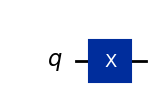

In [5]:
# Circuito de 1 cúbit en el estado |0> con una puerta X
qc = QuantumCircuit(1)

# Aplicamos la puerta X al cúbit
qc.x(0)

qc.draw('mpl',style="iqp")

In [6]:
# Creo una función para simular y mostrar
# el vector de estado
def obten_estado(qcirc, etiqueta):
    # Salvamos el vector de estado final del circuito
    qcirc.save_statevector()

    # Hacemos una simulación y obtenemos los resultados
    qobj = transpile(qcirc, sim)
    result = execute(qobj, sim).result()
    estado = result.get_statevector()
    array_to_latex(estado, pretext=etiqueta)
    display(estado.draw('bloch'))

<IPython.core.display.Math object>

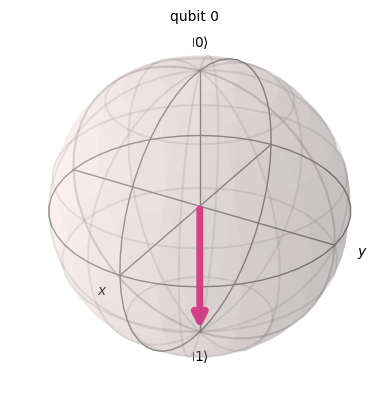

In [7]:
obten_estado(qc, "X|0\\rangle = ")

## Ejercicio 3.1
Crea un circuito de 1 cúbit en estado $|+\rangle$, aplícale una puerta $Z$ y obtén el vector de estado de salida.

In [ ]:
# Circuito de 1 cúbit en el estado |+> con una puerta Z
from math import sqrt
qc = QuantumCircuit(1)
qc.initialize([1/sqrt(2), 1/sqrt(2)])

# Aplicamos la puerta Z al cúbit
qc.z(0)

display(qc.draw('mpl'))
obten_estado(qc, "Z|+\\rangle = ")

### Aplicación de varias puertas

Al igual que en el caso clásico, si aplicamos varias puertas sobre un mismo cúbit la matriz equivalente será el producto de las matrices de cada puerta.

Qiskit proporciona un `simulador unitario`que obtiene esa matriz por nosotros:

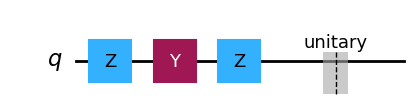

In [23]:
# Circuito con varias puertas simples y obtenemos la matriz unitaria equivalente
qc = QuantumCircuit(1)
qc.z(0)
qc.y(0)
qc.z(0)
#Necesito indicar que se salve la matriz unitaria
qc.save_unitary()

qc.draw('mpl', style="iqp")

In [35]:
# Simula y obtén la matriz unitaria equivalente
# Usamos Aer con el modo Unitary
sim_u = AerSimulator(method='unitary')



result = execute(transpile(qc, sim_u), sim_u).result()
unitary = result.get_unitary(qc)
unitary.draw('latex', prefix="ZYZ = ")

<IPython.core.display.Latex object>

Debido a que el producto de matrices no es conmutativo, al obtener la matriz equivalente, tenemos que tener en cuenta que el orden en el que se aplican las puertas:

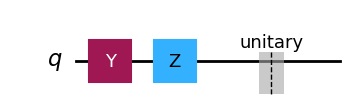

<IPython.core.display.Latex object>

In [34]:
# Circuito con dos puertas y obtenemos la matriz unitaria equivalente
qc = QuantumCircuit(1)
qc.y(0)
qc.z(0)

#Necesito indicar que se salve la matriz unitaria
qc.save_unitary()

display(qc.draw('mpl', style="iqp"))
result = execute(transpile(qc, sim_u), sim_u).result()
unitary = result.get_unitary(qc)
unitary.draw("latex", prefix="ZY = ")

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


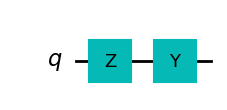

<class 'qiskit_aer.backends.compatibility.Operator'>


In [27]:
# Intercambiamos el orden
qc = QuantumCircuit(1)
qc.z(0)
qc.y(0)

display(qc.draw('mpl'))

#Necesito indicar que se salve la matriz unitaria
qc.save_unitary()

result = execute(transpile(qc, sim_u), sim_u).result()
unitary = result.get_unitary(qc)
#array_to_latex(unitary, pretext="YZ = ")

In [ ]:
# Creo una funcion para obtener y
# mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    sim_u = AerSimulator(method='unitary')
    #Necesito indicar que se salve la matriz unitaria
    qcirc.save_unitary()

    result = execute(transpile(qc, sim_u), sim_u).result()
    unitary = result.get_unitary(qcirc)
    array_to_latex(unitary, pretext=etiqueta)

### Puertas _phase shift_ <a id="phase"></a>

Puertas que cambian la fase relativa:

$$
R_\theta  = \begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix} \equiv |0\rangle\langle0| + e^{i\theta}|1\rangle\langle1|
$$

La inversa de $R_\theta$ es su conjugada traspuesta:
$$
R_\theta^\dagger = \begin{bmatrix}1 & 0 \\ 0 & e^{-i\theta} \end{bmatrix}
$$

Ejemplos:

$$
R_\theta|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ e^{i\theta}\end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle)
$$

Casos particulares:

$$
Z = R_\pi = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
S = R_{\pi/2} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix} = \sqrt{Z}
$$

$$
T = R_{\pi/4} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} = \sqrt{S}
$$

#### Relaciones
- $SXS^\dagger = Y$
- $SYS^\dagger = -X$
- $SZS^\dagger = Z$

In [ ]:
# Ejemplo, rotación 3𝜋/2
import numpy as np
qc = QuantumCircuit(1)
theta = 3*np.pi/2
qc.p(theta, 0)
display(qc.draw('mpl'))
obten_unitaria(qc, "R_{3𝜋/2} = ")

In [ ]:
# Circuito equivalente a Y
qc = QuantumCircuit(1)
qc.sdg(0)
qc.x(0)
qc.s(0)

display(qc.draw('mpl'))

# Simula y obtén la unitaria
obten_unitaria(qc, "SXS^\dagger = ")

### Puerta Hadamard <a id="hada"></a>

$$
H = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}
$$

Ejemplos

$$
H|0\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}1 \\ 0 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle) =  |+\rangle
$$

$$
H|1\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}0 \\ 1 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) =  |-\rangle
$$

Esta puerta permite transformar un estado simple ($|0\rangle$ o $|1\rangle$) en una superposición.

La siguiente expresión es general para $|x\rangle = |0\rangle$ o $|x\rangle = |1\rangle\$:

$$
H|x\rangle = \frac{1}{\sqrt{2}}\sum_{z=0}^1 (-1)^{x\cdot z} |z\rangle
$$

## Ejercicio 3.2

Crea un circuito de 1 cúbit en estado $|0\rangle$ (por defecto), aplícale una puerta $H$ y obtén el vector de estado de salida.

In [ ]:
# Circuito de 1 cúbit en el estado |+> con una puerta H
qc = QuantumCircuit(1)

# Aplicamos la puerta H al cúbit
qc.h(0)

display(qc.draw('mpl'))

obten_estado(qc, "H|0\\rangle = ")

#### Relaciones

- $HXH = Z$
- $HYH = -Y$
- $HZH = X$

In [ ]:
# Circuito equivalente a Z
qc = QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.h(0)

display(qc.draw('mpl'))

# Simula y obtén la unitaria
obten_unitaria(qc, "HXH = ")

### Puerta $\sqrt{X}$

$$
\sqrt{X} = \frac{1}{2}\begin{bmatrix}1+i & 1-i \\ 1-i & 1+i\end{bmatrix}
$$

$$
X = \left(\sqrt{X}\right)^2
$$

Ejemplos:

$$
\sqrt{X}|0\rangle = \frac{1}{2}\begin{bmatrix}1+i & 1-i \\ 1-i & 1+i\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = \frac{(1+i)|0\rangle + (1-i)|1\rangle}{2}
$$

$$
\sqrt{X}|1\rangle = \frac{1}{2}\begin{bmatrix}1+i & 1-i \\ 1-i & 1+i\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = \frac{(1-i)|0\rangle + (1+i)|1\rangle}{2}
$$

--------------------------------------------------------------------------------------------------

## Puertas como rotaciones en la esfera de Bloch <a id="bloch"></a>

Las puertas pueden verse como una rotación del cúbit en la esfera de Bloch:

- $X$, $Y$, $Z$: rota un ángulo $\pi$ alrededor del eje x, y o z, respectivamente
- $R_\theta$ o $R_z(\theta)$: rota un ángulo $\theta$ alrededor del eje z
- $S$: rota $\tfrac{\pi}{2}$ alrededor del eje z
- $T$: rota $\tfrac{\pi}{4}$ alrededor del eje z
- $H$:  combinación de dos rotaciones: primero $\pi$ alrededor de z seguida de $\pi/2$ alrededor de y

En general, existen infinitas puertas. Las más usadas son rotaciones alrededor de z, simplemente por usar como base estándar $\{|0\rangle,|1\rangle\}$, pero también existen $R_x(\phi)$ y $R_y(\phi)$. Estas rotaciones se pueden expresar como exponenciales de las matrices de Pauli:

$$
R_x(\theta) = e^{-i\theta \sigma_x/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_x =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -i\sin\frac{\theta}{2}\\
-i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
R_y(\theta) = e^{-i\theta \sigma_y/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_y =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -\sin\frac{\theta}{2}\\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
\begin{aligned}
R_z(\theta) & = e^{-i\theta \sigma_z/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_z =
\begin{bmatrix}
e^{-i\frac{\theta}{2}}   & 0\\
0 & e^{i\frac{\theta}{2}}
\end{bmatrix} \\
&=
e^{-i\frac{\theta}{2}} \begin{bmatrix}
1   & 0\\
0 & e^{i\theta}
\end{bmatrix}= e^{-i\frac{\theta}{2}}R_\theta
\end{aligned}
$$

Así, la puerta $H$ puede escribirse como:
$$
\begin{aligned}
H &= R_y(\tfrac{\pi}{2})R_z(\pi) =
\begin{bmatrix}
\cos\frac{\pi}{4}   & -\sin\frac{\pi}{4}\\
\sin\frac{\pi}{4} & \cos\frac{\pi}{4}
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & e^{i\pi}
\end{bmatrix} \\[10pt] &=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & -1\\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & -1
\end{bmatrix} =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & 1\\
1 & -1
\end{bmatrix}
\end{aligned}
$$

Es posible comprobar que también se verifica:

$$
H = R_y(-\tfrac{\pi}{4})R_x(\pi)R_y(\tfrac{\pi}{4})
$$

In [ ]:
# Ejemplo de rotaciones del Qiskit textbook
from qiskit_textbook.widgets import gate_demo
gate_demo()

## Ejercicio 3.3

Partiendo de un cúbit en estado $|0\rangle$, aplica una puerta $R_y(\theta)$ para obtener un estado con un 30% de probabilidad de medir 0 y un 70% de medir 1
- Crea el circuito y simúlalo, comprobando que funciona

In [ ]:
from math import sqrt,acos

prob = [0.3, 0.7]

qc = QuantumCircuit(1, 1)
theta = 2*acos(sqrt(prob[0]))
print(f"𝜃 = {theta}")

qc.ry(theta, 0)
qc.measure(0, 0)
display(qc.draw('mpl'))

# Hacemos 1024 simulaciones (shots)
job_sim = execute(transpile(qc, sim), sim, shots=10000)
# Obtenemos los resultados
result = job_sim.result()
# Mostramos el histograma
plot_histogram(result.get_counts())

--------------------------------------------------------------------------------------------------

## Puertas genéricas <a id="generica"></a>

Una puerta genérica se puede expresar como una combinación de rotaciones y desplazamientos de fase. Se puede demostrar que si $U$ es una puerta de 1 cúbit, existen $\alpha$, $\beta$, $\gamma$ y $\delta$ reales tales que:

$$
U = e^{i\alpha}R_z(\beta)R_y(\gamma)R_z(\delta)
$$


Qiskit define una puerta genérica $U$:

$$
U(\theta, \phi, \lambda, \gamma) = \begin{bmatrix} e^{i\gamma}\cos\frac{\theta}{2} & -e^{i(\gamma+\lambda)}\sin\frac{\theta}{2} \\
            e^{i(\gamma+\phi)}\sin\frac{\theta}{2} & e^{i(\gamma+\lambda+\phi)}\cos\frac{\theta}{2}
     \end{bmatrix}
$$

Las rotaciones se pueden obtener a partir de esta puerta:
$$
\begin{aligned}
R_z(\alpha) = U(0, 0, \alpha, 0) & \quad & R_y(\alpha) = U(\alpha, 0, 0, 0) & \quad & R_x(\alpha) = U(\alpha, -\tfrac{\pi}{2}, \tfrac{\pi}{2}, 0)
\end{aligned}
$$

--------------------------------------------------------------------------------------------------

## Puertas de 1 cúbit en un sistema multicúbit <a id="puertas1c"></a>

Igual que en el caso de puertas clásicas, las puertas en paralelo (que actúan sobre dos cúbits diferentes) se combinan usando el producto tensor.

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
obten_unitaria(qc, "X\otimes H = ")

El efecto conjunto de ambas puertas puede obtenerse mediante el producto tensor de sus matrices (en orden, del cúbit más al menos significativo):

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

Ese producto tensor es:

$$
\begin{aligned}
X\otimes H &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} \\
&= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
\end{aligned}
$$

que se multiplica por el vector de 4 filas $|q_1 q_0\rangle$.

La matriz anterior se puede escribir como:

$$
X\otimes H =
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$


Si solo tenemos una puerta actuando sobre un cúbit, se considera que sobre la otra actúa la puerta $I$

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
display(qc.draw('mpl'))
obten_unitaria(qc,"X\otimes I = ")

En este ejemplo, las puertas aplicadas son:
$$
X|q_1\rangle \otimes I|q_0\rangle = (X\otimes I)|q_1 q_0\rangle
$$

Otro ejemplo más complejo:

In [ ]:
# 2 cúbits y 3 puertas
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
obten_unitaria(qc, "(H\otimes I)\cdot(X\otimes H) = HX\otimes IH = ")

Si aplicamos esa matriz al estado $|00\rangle$ tenemos:

$$
\frac{1}{2}\begin{bmatrix}1&1&1&1\\1&-1&1&-1\\-1&-1&1&1\\-1&1&1&-1\end{bmatrix}\begin{bmatrix}1\\0\\0\\0\end{bmatrix} = \frac{1}{2}\begin{bmatrix}1\\1\\-1\\-1\end{bmatrix}
$$

Este estado es el producto tensor $|-\rangle \otimes |+\rangle$, ya que tenemos el producto:

$$
HX|0\rangle \otimes H|0\rangle = H|1\rangle \otimes H|0\rangle = |-\rangle\otimes|+\rangle
$$

Podemos verificarlo así:
$$
|-+\rangle = |-\rangle\otimes|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\-1\end{bmatrix}\otimes\tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\1\end{bmatrix} = \frac{1}{2}\begin{bmatrix}1\\1\\-1\\-1\end{bmatrix}\\ = \frac{1}{2}(|00\rangle+|01\rangle-|10\rangle-|11\rangle)
$$

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
obten_estado(qc, "")

## Ejercicio 3.4 (ENTREGABLE)

Partiendo de dos cúbits en estado $|00\rangle$, aplica una puerta $R_y(\theta)$ a cada cúbit para obtener un estado con las siguientes probabilidades:
+ 24% para |00>
+ 56% para |01>
+ 6%  para |10>
+ 14% para |11>

Crea el circuito y simúlalo para comprobar que funciona

In [ ]:
from math import sqrt,acos,atan

prob = [0.24, 0.56, 0.06, 0.14]

qc = QuantumCircuit(2)

qc.ry(...)
qc.ry(...)

qc.measure_all()
display(qc.draw('mpl'))


# Hacemos 1024 simulaciones (shots)
job_sim = execute(transpile(qc, sim), sim, shots=1024)
# Obtenemos los resultados
result = job_sim.result()
# Mostramos el histograma
plot_histogram(result.get_counts())

-------------------------
-------------------------

# Puerta de 2 cúbits: CNOT <a id="cnot"></a>

Realiza un NOT (puerta X) en el cúbit objetivo (_target_) si el estado del cúbit de control es $|1\rangle$. La puerta se representa en un circuito como la del siguiente ejemplo, con `q0` como control y `q1` como target:

In [ ]:
qc = QuantumCircuit(2)
# Aplica CNOT, primer parámetro control, segundo target
qc.cx(0,1)
display(qc.draw('mpl'))

obten_unitaria(qc, "CNOT = ")

Esta matriz intercambia las amplitudes de los estados $|01\rangle$ and $|11\rangle$ del vector de estado (aquellos en las que el cúbit `q0` es 1):

$$
|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{1} \\ a_{2} \\ a_{3} \end{bmatrix}, \quad \text{CNOT}|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{3} \\ a_{2} \\ a_{1} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

Podemos cambiar el papel de target y control

In [ ]:
qc = QuantumCircuit(2)
# Aplica CNOT, primer parámetro target, segundo control
qc.cx(1,0)
display(qc.draw('mpl'))

obten_unitaria(qc, "CNOT = ")

En este caso, el efecto sobre el vector de estado será:

$$
|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{1} \\ a_{2} \\ a_{3} \end{bmatrix}, \quad \text{CNOT}|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{1} \\ a_{3} \\ a_{2} \end{bmatrix} \begin{matrix} \\  \\ \leftarrow \\ \leftarrow \end{matrix}
$$

Esto equivale a considerar $q_0$ como el cúbit más significativo, es decir $|q_0q_1\rangle$

Se puede demostrar que el circuito anterior es equivalente al siguiente:

In [ ]:
qc = QuantumCircuit(2)
# Aplica CNOT, primer parámetro target, segundo control
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl'))

obten_unitaria(qc, "CNOT = ")

**Ejemplo**: acción de la CNOT usando como control un cúbit en estado $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ y como target un cúbit en estado $|0\rangle$:

In [ ]:
# Circuito con puerta H en q0
qc = QuantumCircuit(2)
# Aplicamos una puerta H al cúbit control
qc.h(0)

display(qc.draw('mpl'))
obten_estado(qc, "|0\\rangle\otimes H|0\\rangle = |0\\rangle\otimes |+\\rangle = ")

Este estado se obtiene como el producto tensor de ambos cúbits $|q_1\rangle \otimes |q_0\rangle$:

- Antes de la H: $|0\rangle \otimes |0\rangle = |00\rangle$
- Después de la H: $|0\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)= \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle) = |0\rangle\otimes|+\rangle = |0+\rangle$

Ahora le incorporamos una CNOT:

In [ ]:
# Hacemos lo mismo añadiendo una CNOT
qc = QuantumCircuit(2)
qc.h(0)
# CNOT: primer parámetro: control, segundo: target
qc.cx(0,1)

display(qc.draw('mpl'))
obten_estado(qc, "\\text{CNOT}|0+\\rangle = ")

El estado obtenido es:
$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}\text{CNOT}(|00\rangle + |01\rangle)= \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

que es un ejemplo de estado entrelazado, en concreto el **estado 0 de Bell**.

In [ ]:
# Hacemos lo mismo añadiendo una medida
qc = QuantumCircuit(2,1)
qc.h(0)
# CNOT: primer parámetro: control, segundo: target
qc.cx(0,1)
qc.measure(0,0)
qc.save_statevector()

qc.draw('mpl')

In [ ]:
# Obtenemos la medida de q0
qobj = transpile(qc, sim)
result = execute(qobj, sim, shots=1).result()
counts = result.get_counts()
plot_histogram(counts)

- Si la medida es 0, el estado final es $|00\rangle \Rightarrow$ la medida de $q_1$ será 0
- Si la medida es 1, el estado final es $|11\rangle \Rightarrow$ la medida de $q_1$ será 1

In [ ]:
vector_final = result.get_statevector()
array_to_latex(vector_final, pretext="|\psi\\rangle = ")

## Estados de Bell <a id="bell"></a>

Son los siguientes estados entrelazados:

$$
|\beta_{00}\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$
$$
|\beta_{01}\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}
$$
$$
|\beta_{10}\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}
$$
$$
|\beta_{11}\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}
$$

Esos estados forman una base del espacio de Hilbert de 2 cúbits.

El estado $|\beta_{00}\rangle$ se obtiene con el siguiente circuito:

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw('mpl'))

obten_estado(qc, "|\\beta_{00}\\rangle = ")

Para conseguir los estados restantes, se puede utilizar la siguiente expresión general:

$$
|\beta_{ij}\rangle = (I\otimes X^jZ^i)|\beta_{00}\rangle
$$

## Ejercicio 3.5

Obtén circuitos para los tres estados de Bell restantes.

#### Estado 1 de Bell

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.x(0)
display(qc.draw('mpl'))

obten_estado(qc, "|\\beta_{01}\\rangle = ")

#### Estado 2 de Bell

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)
display(qc.draw('mpl'))

obten_estado(qc, "|\\beta_{10}\\rangle = ")

#### Estado 3 de Bell

### Estados entrelazados de más cúbits

Los estados entrelazados de más de 2 cúbits se denominan [estados _GHZ_](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state)

Uno de estos estados para 3 cúbits es:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}
$$

y se puede obtener con el siguiente circuito:

In [ ]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
display(qc.draw('mpl'))

obten_estado(qc, "|GHZ\\rangle = ")

## Ejercicio 3.6

Modifica el circuito anterior para obtener el estado:
$$
|GHZ\rangle = \frac{|010\rangle-|101\rangle}{\sqrt{2}}
$$

## Puerta swap <a id="swap"></a>

Intercambia dos cúbits

In [ ]:
qc = QuantumCircuit(2)
qc.x(1)
qc.swap(0,1)
display(qc.draw('mpl'))

obten_estado(qc, "\\text{SWAP}|01\\rangle = \n")

Esta puerta se puede implementar con CNOTs como sigue:

In [ ]:
qc = QuantumCircuit(2)
qc.swap(0,1)
display(qc.draw('mpl'))
obten_unitaria(qc, "\\text{SWAP} = \n")

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
display(qc.draw('mpl'))
obten_unitaria(qc, "\\text{SWAP} = \n")

-------------------------------------------
-------------------------------------------

# Otras puertas controladas <a id="otrasp"></a>

La puerta CNOT se llama también controlled-X. Esa misma idea se puede aplicar a cualquier otra puerta $U$. La matrix de una operación controlled-U es, suponiendo $q_0$ el cúbit más significativo:

$$
\begin{aligned}
\text{U} & =
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & =
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$

O suponiendo $q_0$ el cúbit menos significativo (orden usado en Qiskit)

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$

**Ejemplo**: Puerta Y controlada

In [ ]:
c = 0
t = 1
qc = QuantumCircuit(2)
qc.cy(c, t)
display(qc.draw('mpl'))


obten_unitaria(qc, "\\text{Controlled-Y} = \n")

Se puede demostrar que, como se tiene la igualdad $Y = SXS^\dagger$, esta puerta se puede implementar con esta circuito:

In [ ]:
qc = QuantumCircuit(2)
qc.sdg(t)
qc.cnot(c,t)
qc.s(t)
display(qc.draw('mpl'))

obten_unitaria(qc, "\\text{Controlled-Y} = \n")

**Ejemplo**: Puerta H controlada

In [ ]:
qc = QuantumCircuit(2)
qc.ch(c, t)
display(qc.draw('mpl'))

obten_unitaria(qc, "\\text{Controlled-H} = \n")

Y como se tiene que: $H = R_y(-\tfrac{\pi}{4})R_x(\pi)R_y(\tfrac{\pi}{4}) = R_y(-\tfrac{\pi}{4})XR_y(\tfrac{\pi}{4})$

In [ ]:
from math import pi
qc = QuantumCircuit(2)
qc.ry(pi/4,t)
qc.cnot(c,t)
qc.ry(-pi/4,t)
display(qc.draw('mpl'))

obten_unitaria(qc, "\\text{Controlled-H} = \n")

En general, se puede demostrar que una puerta $U$ cualquiera se puede obtener como $U=e^{i\alpha}AXBXC$ donde $A$, $B$, y $C$ son operadores unitarios que verifican que $ABC = I$. De esta forma, la versión controlada de U se puede obtener como:

![Controlled-U](images/Controlled-U.png)

## Phase-kickback <a id="kick"></a>

Un efecto interesante se ve cuando se usan rotaciones controladas.

Por ejemplo, si aplicamos una $T$ a un cúbit en estado $|1\rangle$, le añadimos una fase $e^{i\pi/4}$:

$$
T|1\rangle =
\begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}
\begin{bmatrix}0 \\ 1\end{bmatrix} =
\begin{bmatrix}0 \\ e^{i\pi/4}\end{bmatrix}
= e^{i\pi/4}|1\rangle
$$

Esta es una _fase global_, que no es observable. Pero si controlamos la operación usando otro cúbit en estado $|{+}\rangle$ se produce un cambio de _fase relativa_ en el cúbit de control. Así, si $q_0=|+\rangle$ y $q_1=|1\rangle$, y aplicamos una `Controlled-T` al estado $|1{+}\rangle$ tenemos:

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}
$$

Es decir, el cúbit $q_1$ se queda como está mientras que el $q_0$ rota $\pi/4$ en torno al eje z.  Este efecto se conoce como _phase-quickback_


In [ ]:
# Cúbit de control
c = 0
# Cúbit target
t = 1
qc=QuantumCircuit(2)
qc.h(c)
qc.x(t)
display(qc.draw('mpl'))

obten_estado(qc, "(X\otimes H)|00\\rangle = ")

In [ ]:
from math import pi
qc=QuantumCircuit(2)
qc.h(c)
qc.x(t)
# cp es Controlled-Phase.
# Para el caso de ángulo pi (puerta Z) se puede usar cz.
qc.cp(pi/4,c,t)

display(qc.draw('mpl'))

obten_estado(qc, "(X\otimes H)P_{\pi/4}|00\\rangle = ")

El efecto es el mismo si intercambiamos los cúbits de control y target:

In [ ]:
qc=QuantumCircuit(2)
qc.h(c)
qc.x(t)
qc.cp(pi/4,t,c)

display(qc.draw('mpl'))

obten_estado(qc, "(X\otimes H)P_{\pi/4}|00\\rangle = ")

Por esto, no tiene sentido en este caso hablar de cúbit de control y target. Por eso, la puerta `Controlled-Z` se representa así:

In [ ]:
qc=QuantumCircuit(2)
qc.cz(c,t)
qc.draw('mpl')

## Ejercicio 3.7

Crea un circuito para ver como afecta una puerta `Controlled-Z`a un estado de superposición completa de 2 cúbis:

$$
|++\rangle = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)
$$

In [ ]:
n = 2
qc = QuantumCircuit(n)

# Ponemos los cúbits en superposición
qc.h(0)
qc.h(1)

# Aplicamos la puerta C-Z
qc.cz(0,1)

qc.save_statevector()
qc.draw('mpl')

In [ ]:
# Simulamos para obtener el estado final
qobj = transpile(qc, sim)
job_sim = execute(qobj, sim)         # Hacemos la simulación
result = job_sim.result()           # Obtenemos los resultados
estado_final = result.get_statevector()
estado_final.draw("latex")

---------------------------------------------------------------------
---------------------------------------------------------------------

# Puertas para múltiples cúbits<a id="multiples"></a>

El vector de estado de un sistema de n cúbits puede escribirse como:

$$
|\psi\rangle = \sum_{i=0}^{2^n-1} a_i|i\rangle
$$
donde $a_i \in \mathbb{C}$ y $\sum_{i=0}^{2^n-1}|a_i|^2 = 1$.

## Puerta _Walsh-Hadamard_<a id="wh"></a>

El uso de puertas `H` permite poner los n-cúbits en superposición.

Ejemplo para 4 cúbits:

$$
H^{\otimes 4}|1000\rangle = H|1\rangle\otimes H|0\rangle\otimes H|0\rangle\otimes H|0\rangle = \\
\frac{1}{4}\left[(|0\rangle - |1\rangle)\otimes (|0\rangle + |1\rangle) \otimes (|0\rangle + |1\rangle) \otimes (|0\rangle + |1\rangle)\right] = \\
\frac{1}{4}\left[|0000\rangle+|0001\rangle+|0010\rangle+|0011\rangle+\cdots+|0111\rangle-|1000\rangle-|1001\rangle-\cdots\right] = \\
\frac{1}{4}\left(\sum_{i=0}^7 |i\rangle - \sum_{i=8}^{15} |i\rangle\right)
$$

En general, para un estado $|x\rangle$ de n-cúbits, se puede escribir:

$$
H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} (-1)^{x\cdot i}|i\rangle
$$

siendo $x\cdot i = x_0i_0\oplus x_1i_1\oplus \ldots \oplus x_{n-1}i_{n-1}$

El estado de _superposición completa_ es:

$$
|+\rangle^{\otimes n} = H^{\otimes n}|0\rangle^{\otimes n}
$$

$H^{\otimes n}$ se conoce como puerta _Walsh-Hadamard_.

In [ ]:
n = 4
qc=QuantumCircuit(n)
qc.x(n-1)
for i in range(n):
    qc.h(i)

display(qc.draw('mpl'))

obten_estado(qc, "|\psi\\rangle = ")

## Puerta Toffoli (Controlled-Controlled-NOT o CCX)<a id="toffoli"></a>

La puerta Toffoli es una puerta de tres qubits con dos controles y un target. Realiza una X en el target sólo si ambos controles están en el estado $|1\rangle$. Permite implementar un AND o NAND de los controles.

In [ ]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli con bits de control a y b y target t
qc.ccx(a,b,t)
qc.draw('mpl')

Si el estado inicial del target es |0⟩, su estado final será un AND de ambos controles. Si el estado inicial del target es |1⟩, su estado final será un NAND de ambos controles.

## Puertas controladas genéricas<a id="genericas"></a>

Una versión de la puerta anterior, reemplazando la $X$ por una $U$ arbitraria puede obtenerse de la siguiente forma:

![CCU](images/CCU.png)

donde se tiene que $V^2 = U$.

En general, se puede pensar en puertas $U$ que actúan sobre $k$ cúbits y que son controladas por $n$ cúbits:

![Puerta controlada general](images/CU-general.png)
